# 4. Training Classifier

In [112]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [113]:

# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [114]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [115]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [116]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 1

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [117]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'C': [0.1,
       0.3,
       0.5,
       0.7,
       0.8999999999999999,
       1.0999999999999999,
       1.3,
       1.5,
       1.7,
       1.9],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [118]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7,
                                              0.8999999999999999,
                                              1.0999999999999999, 1.3, 1.5, 1.7,
                                              1.9],
          

In [119]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.9}

The mean accuracy of a model with these hyperparameters is:
0.9587519830777367


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [120]:

# Create the parameter grid based on the results of random search 
param_grid = {'C': [float(x) for x in np.linspace(start = 0.6, stop = 1.5, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['sag'],
               'class_weight': ['balanced']}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [121]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.9s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                               1.3, 1.4, 1.5],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'solver': ['sag']},
 

In [122]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1.4, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9696


In [123]:
best_classifier = grid_search.best_estimator_

best_classifier

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

### Model fit and performance

In [124]:
best_classifier.fit(features_train, labels_train)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [125]:
classifier_pred = best_classifier.predict(features_test)

In [126]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.985722,0.94012


In [127]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.90      0.96      0.93        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



### Confusion Matrix

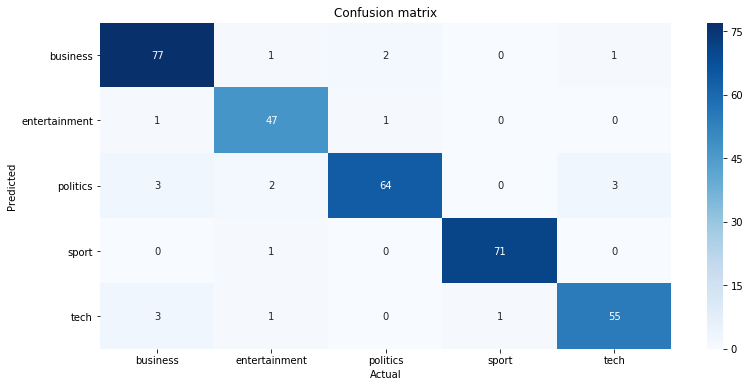

In [128]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [129]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\ASLAB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASLAB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9431137724550899

In [130]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9401197604790419

# Latihan

1. Coba buatkan feature berikut, lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
2. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
3. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
4. Opsional: Gunakan word embedding (e.g word2vec, GloVe), Gunakan classifier yang berbeda-beda.


# Jawaban

Cukup tuliskan jawaban di sini :
1. contoh: 
Testing accuracy tanpa proses Normalisasi dengan classifier Linear Regression : 
dst..
Visualisasi dalam bentuk tabel dengan panda dataframe akan lebih baik.

2.

3.

### Soal 1

In [131]:
classifier_pred0 = classifier_pred
train_score = accuracy_score(labels_train, best_classifier.predict(features_train))

**a. Tanpa proses normalization**

In [132]:
# Dataframe
path_df1 = "Data/df_1.pickle"
with open(path_df1, 'rb') as data:
    df1 = pickle.load(data)

# features_train
path_features_train1 = "Data/features_train_1.pickle"
with open(path_features_train1, 'rb') as data:
    features_train1 = pickle.load(data)

# labels_train
path_labels_train1 = "Data/labels_train_1.pickle"
with open(path_labels_train1, 'rb') as data:
    labels_train1 = pickle.load(data)

# features_test
path_features_test1 = "Data/features_test_1.pickle"
with open(path_features_test1, 'rb') as data:
    features_test1 = pickle.load(data)

# labels_test
path_labels_test1 = "Data/labels_test_1.pickle"
with open(path_labels_test1, 'rb') as data:
    labels_test1 = pickle.load(data)

In [133]:
print(features_train1.shape)
print(features_test1.shape)

(1891, 300)
(334, 300)


In [134]:
best_classifier.fit(features_train1,labels_train1)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [135]:
train_score1 = accuracy_score(labels_train1, best_classifier.predict(features_train1))

In [136]:
classifier_pred1 = best_classifier.predict(features_test1)

In [137]:
accuracy_score(labels_test1, classifier_pred1)

0.9341317365269461

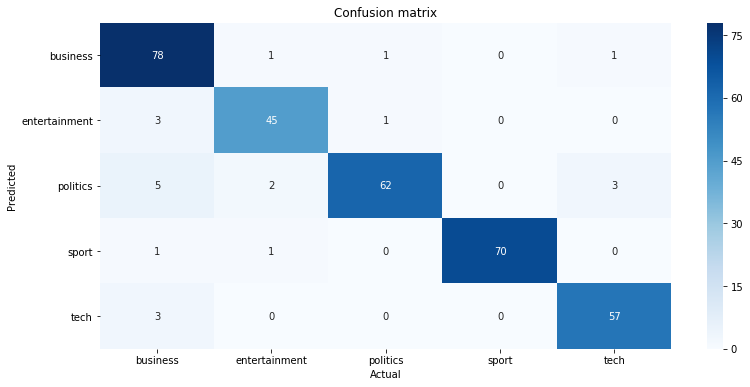

In [138]:
aux_df = df1[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred1)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

**b. Tanpa proses Lemmatization**

In [139]:
# Dataframe
path_df2 = "Data/df2.pickle"
with open(path_df2, 'rb') as data:
    df2 = pickle.load(data)

# features_train
path_features_train2 = "Data/features_train2.pickle"
with open(path_features_train2, 'rb') as data:
    features_train2 = pickle.load(data)

# labels_train
path_labels_train2 = "Data/labels_train2.pickle"
with open(path_labels_train2, 'rb') as data:
    labels_train2 = pickle.load(data)

# features_test
path_features_test2 = "Data/features_test2.pickle"
with open(path_features_test2, 'rb') as data:
    features_test2 = pickle.load(data)

# labels_test
path_labels_test2 = "Data/labels_test2.pickle"
with open(path_labels_test2, 'rb') as data:
    labels_test2 = pickle.load(data)

In [140]:
print(features_train2.shape)
print(features_test2.shape)

(1891, 300)
(334, 300)


In [141]:
best_classifier.fit(features_train2,labels_train2)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [142]:
train_score2 = accuracy_score(labels_train2, best_classifier.predict(features_train2))

In [143]:
classifier_pred2 = best_classifier.predict(features_test2)

In [144]:
accuracy_score(labels_test2, classifier_pred2)

0.9461077844311377

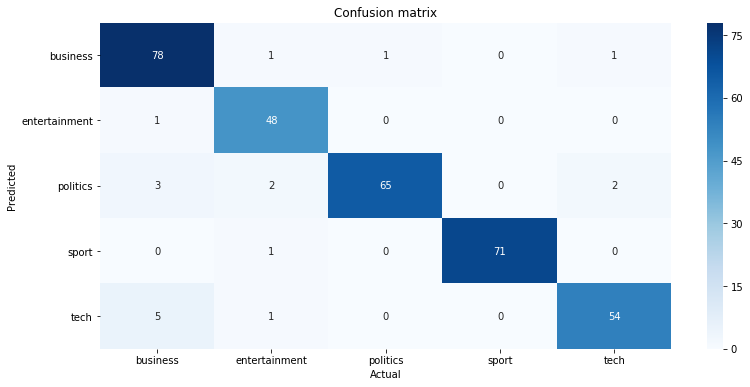

In [145]:
aux_df = df2[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

**c. Tanpa proses Stopword Removal**

In [146]:
# Dataframe
path_df3 = "Data/df3.pickle"
with open(path_df3, 'rb') as data:
    df3 = pickle.load(data)

# features_train
path_features_train3 = "Data/features_train3.pickle"
with open(path_features_train3, 'rb') as data:
    features_train3 = pickle.load(data)

# labels_train
path_labels_train3 = "Data/labels_train3.pickle"
with open(path_labels_train3, 'rb') as data:
    labels_train3 = pickle.load(data)

# features_test
path_features_test3 = "Data/features_test3.pickle"
with open(path_features_test3, 'rb') as data:
    features_test3 = pickle.load(data)

# labels_test
path_labels_test3 = "Data/labels_test3.pickle"
with open(path_labels_test3, 'rb') as data:
    labels_test3 = pickle.load(data)

In [147]:
print(features_train3.shape)
print(features_test3.shape)

(1891, 300)
(334, 300)


In [148]:
best_classifier.fit(features_train3,labels_train3)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [149]:
train_score3 = accuracy_score(labels_train3, best_classifier.predict(features_train3))

In [150]:
classifier_pred3 = best_classifier.predict(features_test3)

In [151]:
accuracy_score(labels_test3, classifier_pred3)

0.9311377245508982

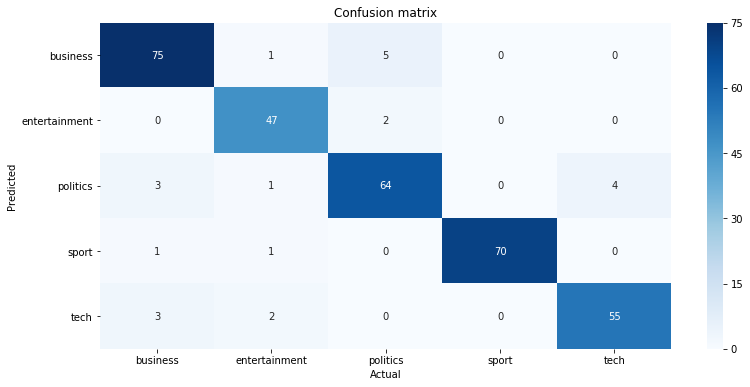

In [152]:
aux_df = df3[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred3)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

**CONCLUSION SOAL 1**

In [173]:
pd.DataFrame({
    'Model' : ['Normal', 'without text normalization', 'without lemmatization', 'without stopword removal'],
    'Train Set Accuracy' : [train_score,train_score1,train_score2,train_score3],
    'Test Set Accuracy' : [accuracy_score(labels_test,classifier_pred0), accuracy_score(labels_test1, classifier_pred1),accuracy_score(labels_test2, classifier_pred2),accuracy_score(labels_test3, classifier_pred3)]
})

,Model,Train Set Accuracy,Test Set Accuracy
0,Normal,0.985722,0.940120
1,without text normalization,0.985722,0.934132
2,without lemmatization,0.983607,0.946108
3,without stopword removal,0.974617,0.931138


### Soal 2

**max_features = 250**

In [156]:
# Dataframe
path_df32a = "Data/df32a.pickle"
with open(path_df32a, 'rb') as data:
    df32a = pickle.load(data)

# features_train
path_features_train32a = "Data/features_train32a.pickle"
with open(path_features_train32a, 'rb') as data:
    features_train32a = pickle.load(data)

# labels_train
path_labels_train32a = "Data/labels_train32a.pickle"
with open(path_labels_train32a, 'rb') as data:
    labels_train32a = pickle.load(data)

# features_test
path_features_test32a = "Data/features_test32a.pickle"
with open(path_features_test32a, 'rb') as data:
    features_test32a = pickle.load(data)

# labels_test
path_labels_test32a = "Data/labels_test32a.pickle"
with open(path_labels_test32a, 'rb') as data:
    labels_test32a = pickle.load(data)

In [158]:
print(features_train32a.shape)
print(features_test32a.shape)

(1891, 250)
(334, 250)


In [159]:
best_classifier.fit(features_train32a,labels_train32a)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [160]:
train_score32a = accuracy_score(labels_train32a, best_classifier.predict(features_train32a))

In [161]:
classifier_pred32a = best_classifier.predict(features_test32a)

In [162]:
accuracy_score(labels_test32a, classifier_pred32a)

0.9281437125748503

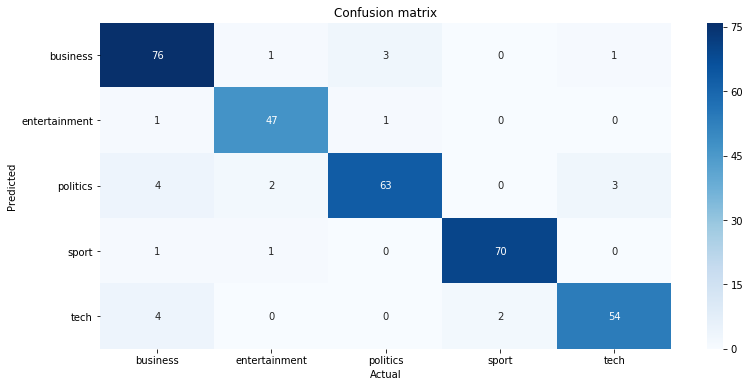

In [170]:
aux_df = df3[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred32a)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

**max_features = 350**

In [164]:
# Dataframe
path_df32b = "Data/df32b.pickle"
with open(path_df32b, 'rb') as data:
    df32b = pickle.load(data)

# features_train
path_features_train32b = "Data/features_train32b.pickle"
with open(path_features_train32b, 'rb') as data:
    features_train32b = pickle.load(data)

# labels_train
path_labels_train32b = "Data/labels_train32b.pickle"
with open(path_labels_train32b, 'rb') as data:
    labels_train32b = pickle.load(data)

# features_test
path_features_test32b = "Data/features_test32b.pickle"
with open(path_features_test32b, 'rb') as data:
    features_test32b = pickle.load(data)

# labels_test
path_labels_test32b = "Data/labels_test32b.pickle"
with open(path_labels_test32b, 'rb') as data:
    labels_test32b = pickle.load(data)

In [165]:
print(features_train32b.shape)
print(features_test32b.shape)

(1891, 350)
(334, 350)


In [166]:
best_classifier.fit(features_train32b,labels_train32b)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [167]:
train_score32b = accuracy_score(labels_train32b, best_classifier.predict(features_train32b))

In [168]:
classifier_pred32b = best_classifier.predict(features_test32b)

In [169]:
accuracy_score(labels_test32b, classifier_pred32b)

0.9550898203592815

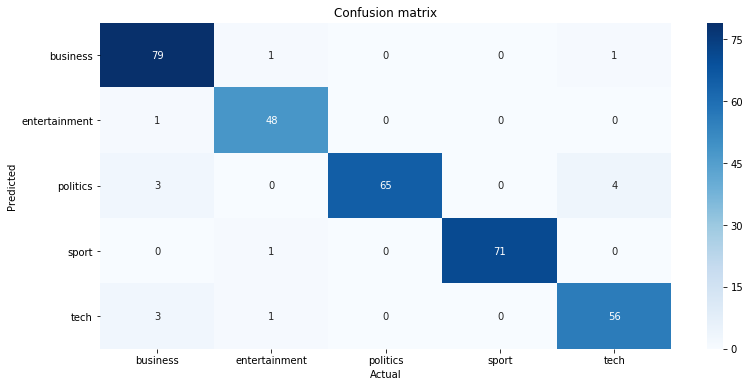

In [171]:
aux_df = df3[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred32b)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

**max_features = none**

In [175]:
# Dataframe
path_df32c = "Data/df32c.pickle"
with open(path_df32c, 'rb') as data:
    df32c = pickle.load(data)

# features_train
path_features_train32c = "Data/features_train32c.pickle"
with open(path_features_train32c, 'rb') as data:
    features_train32c = pickle.load(data)

# labels_train
path_labels_train32c = "Data/labels_train32c.pickle"
with open(path_labels_train32c, 'rb') as data:
    labels_train32c = pickle.load(data)

# features_test
path_features_test32c = "Data/features_test32c.pickle"
with open(path_features_test32c, 'rb') as data:
    features_test32c = pickle.load(data)

# labels_test
path_labels_test32c = "Data/labels_test32c.pickle"
with open(path_labels_test32c, 'rb') as data:
    labels_test32c = pickle.load(data)

In [176]:
print(features_train32c.shape)
print(features_test32c.shape)

(1891, 5854)
(334, 5854)


In [177]:
best_classifier.fit(features_train32c,labels_train32c)

LogisticRegression(C=1.4, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [178]:
train_score32c = accuracy_score(labels_train32c, best_classifier.predict(features_train32c))

In [179]:
classifier_pred32c = best_classifier.predict(features_test32c)

In [180]:
accuracy_score(labels_test32c, classifier_pred32c)

0.9820359281437125

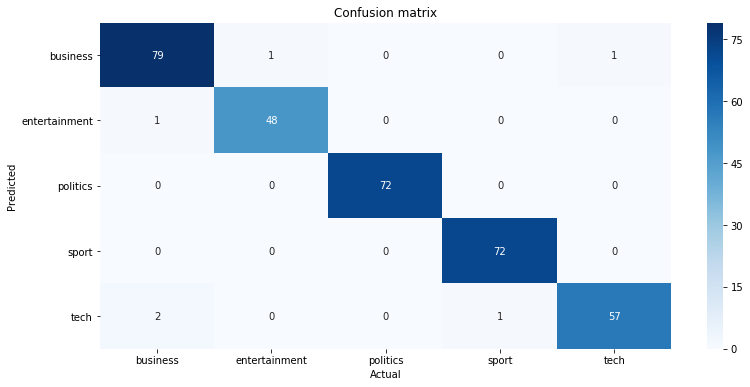

In [181]:
aux_df = df3[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred32c)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

**CONCLUSION SOAL 2**

In [182]:
pd.DataFrame({
    'Model' : ['250 features', '300 features', '350 features','unlimited features'],
    'Train Set Accuracy' : [train_score32a,train_score,train_score32b,train_score32c],
    'Test Set Accuracy' : [accuracy_score(labels_test32a, classifier_pred32a),accuracy_score(labels_test,classifier_pred0),accuracy_score(labels_test32b, classifier_pred32b),accuracy_score(labels_test32c, classifier_pred32c)]
})

,Model,Train Set Accuracy,Test Set Accuracy
0,250 features,0.979905,0.928144
1,300 features,0.985722,0.940120
2,350 features,0.986779,0.955090
3,unlimited features,0.997356,0.982036


### Soal 3